In [87]:
#carrecando de libs
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import math
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

In [88]:
# import dos dados
# importando CSV que foi baixado em: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
df = pd.read_csv("/Users/lucaszanforlin/Documents/Projetos/Kaggle/body-fat/body_fat/data/raw/Bodyfat.csv")


In [89]:
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# EDA

In [90]:
# tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   bodyfat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [91]:
# informações estatisticos 
df.describe()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [92]:
# verificando duplicados
df.duplicated().sum()

0

In [93]:
# verificando dados missings/faltantes"
df.isna().sum()

Density    0
bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

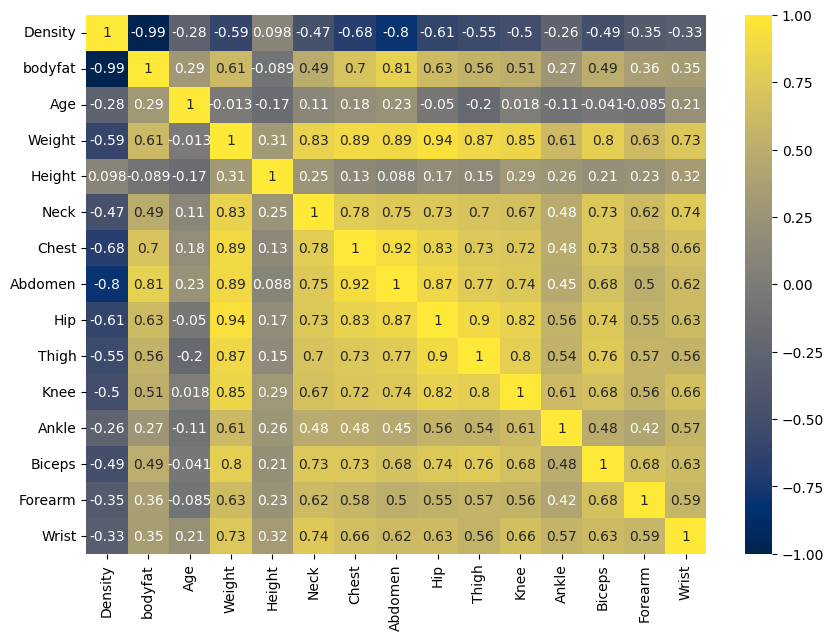

In [94]:
# varificando a correlaçao/multicolinariedade dos dados entre as variaveis 
# correlaçao significativa +/- 0,70
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
plt.show()

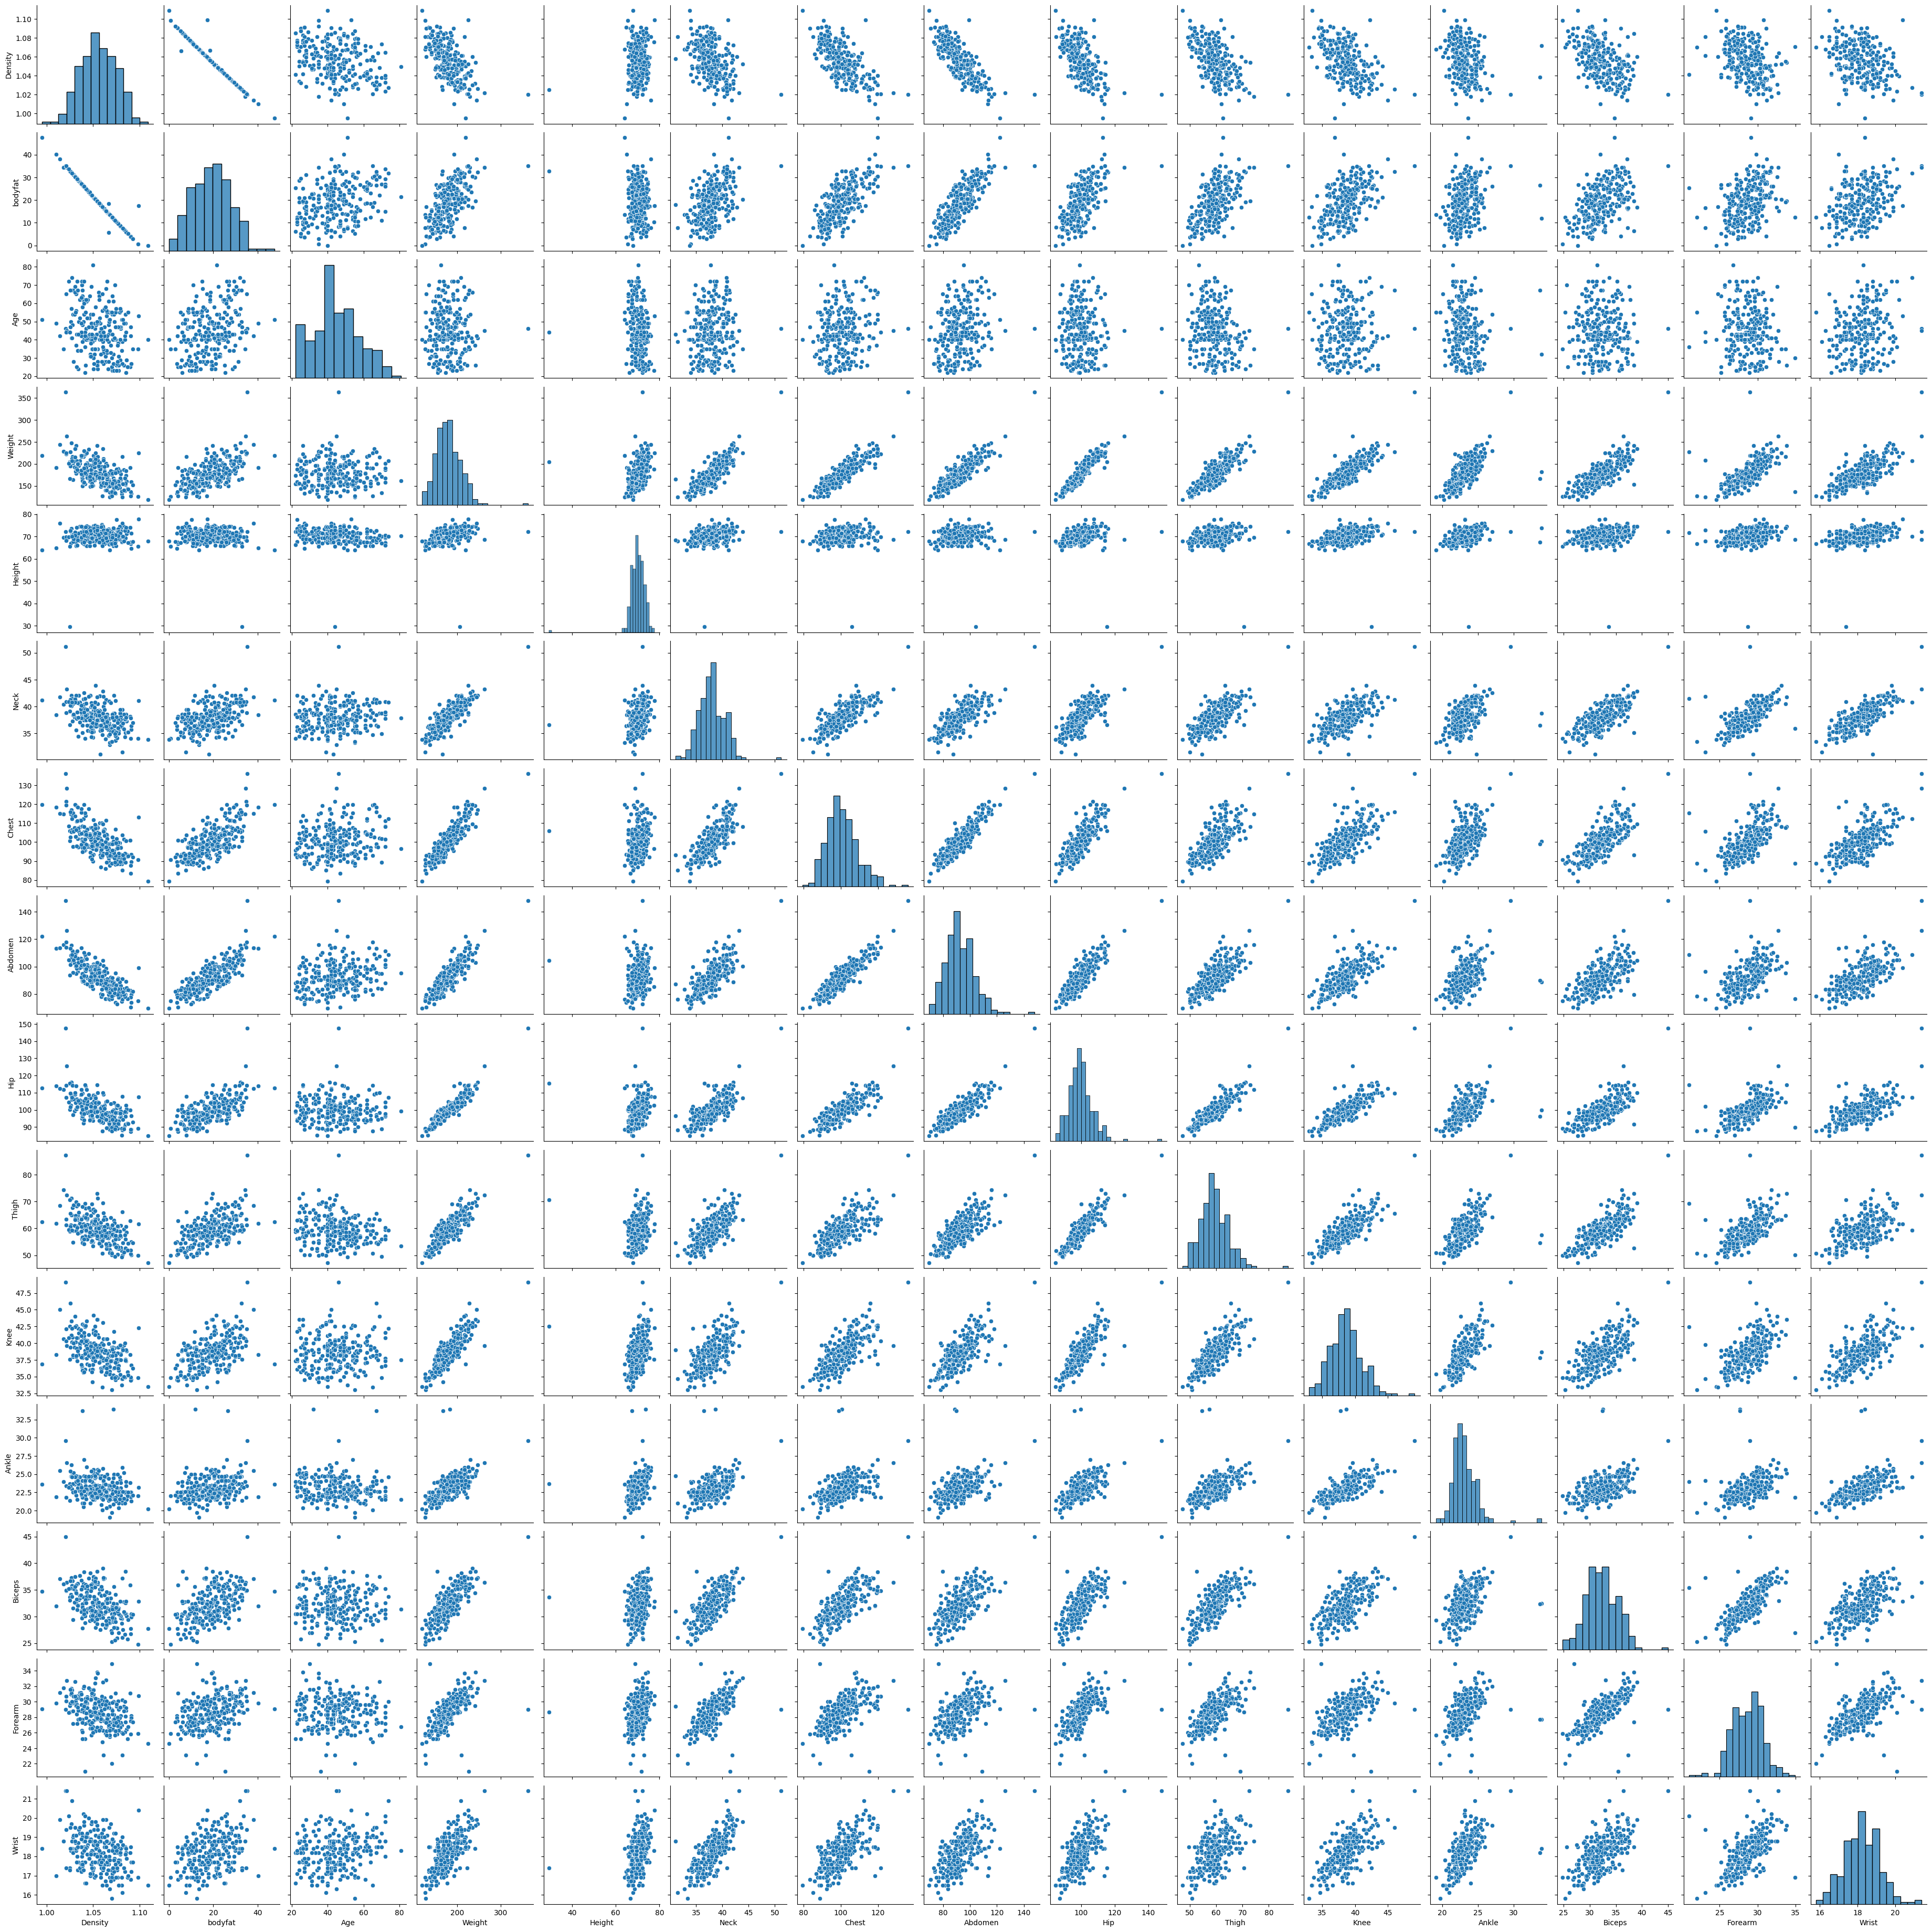

In [95]:
# varificando diversos tipos de graficos com pairplots do seaborn
sns.pairplot(df)

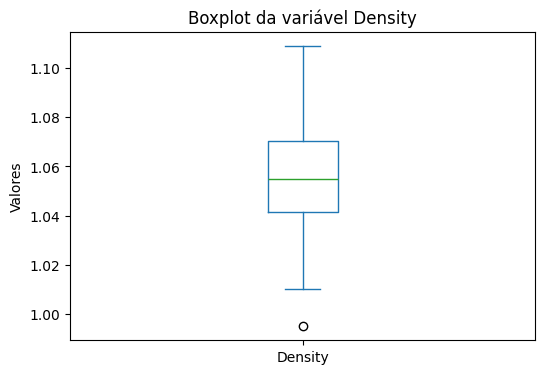

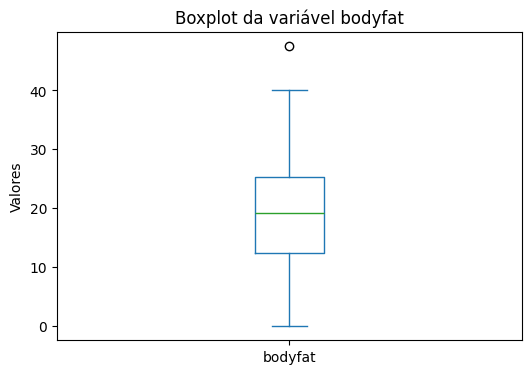

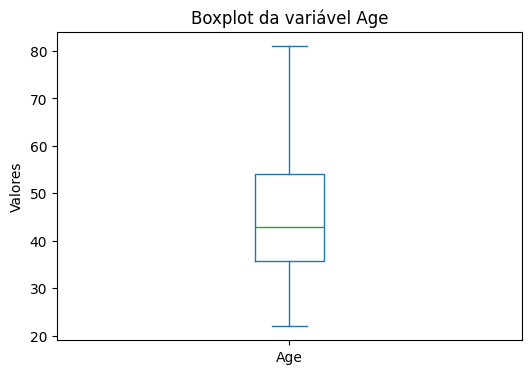

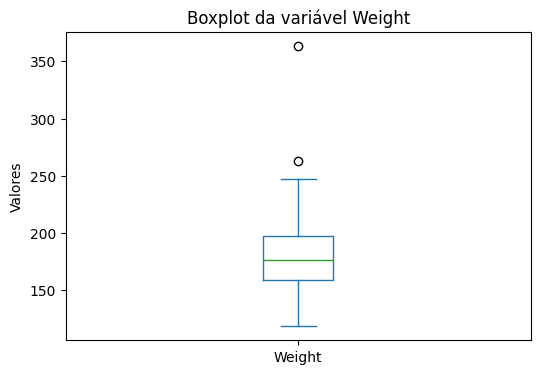

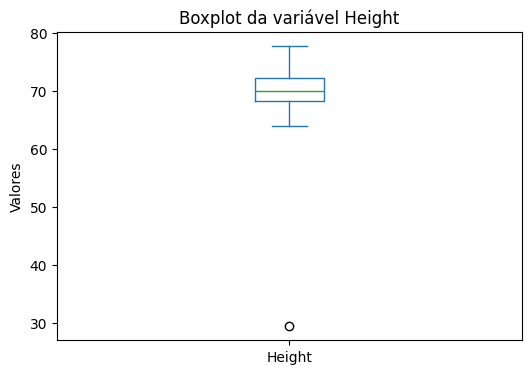

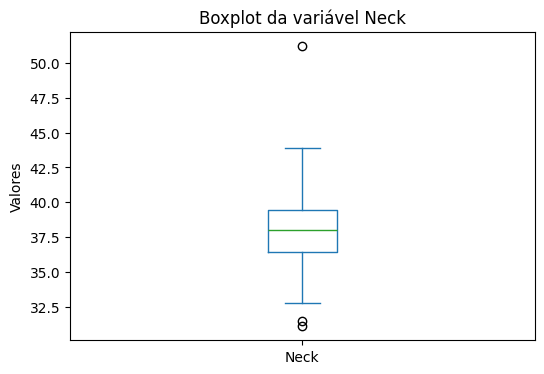

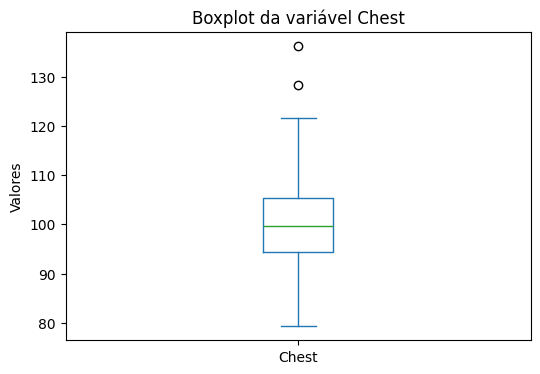

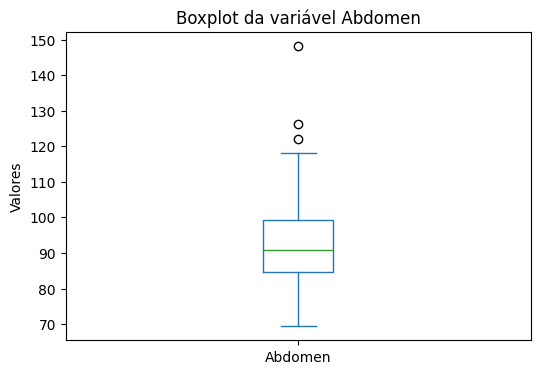

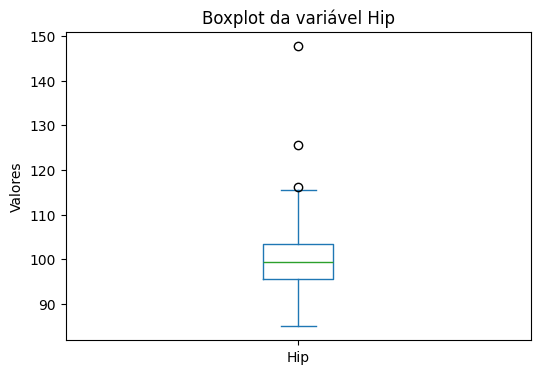

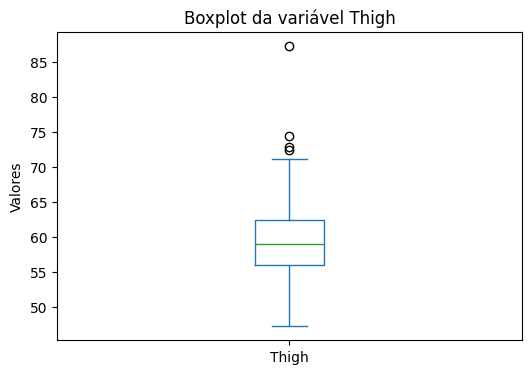

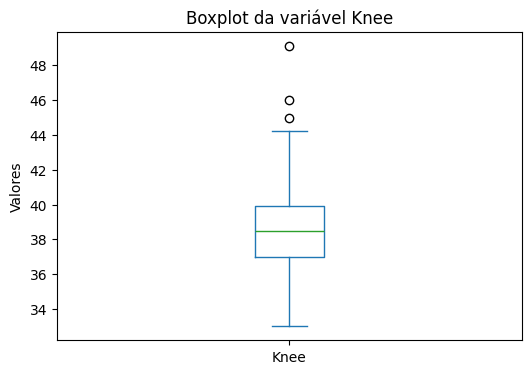

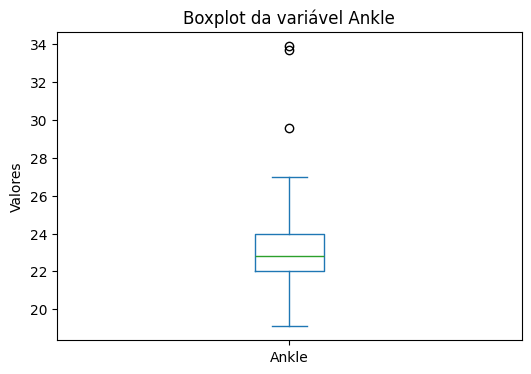

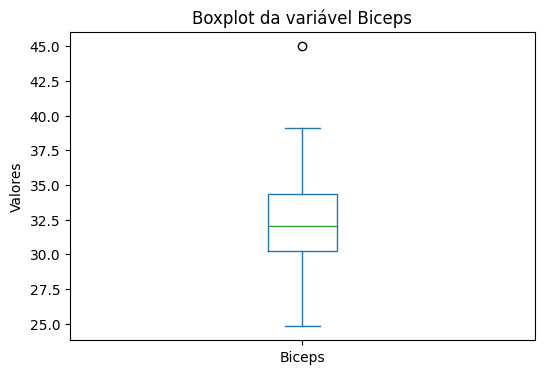

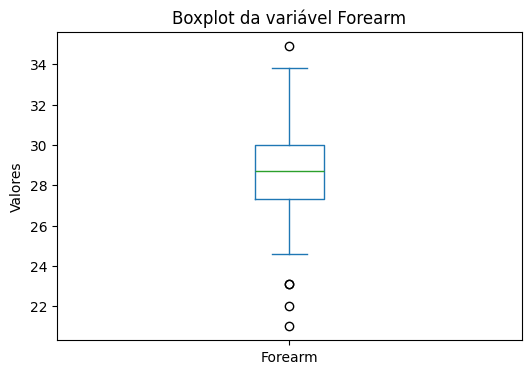

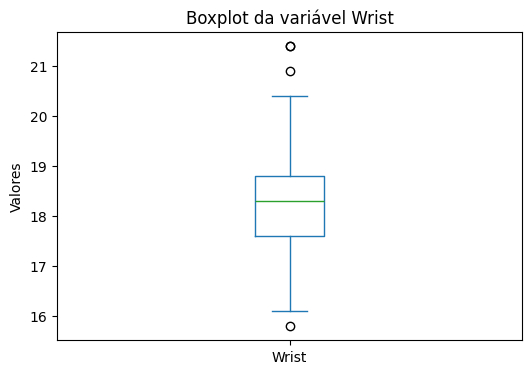

In [96]:
# Criar um boxplot para cada variável do DataFrame a fim de verificar outliers
for coluna in df.columns:
    plt.figure(figsize=(6, 4))  # Ajuste o tamanho do gráfico conforme necessário
    df[coluna].plot(kind='box')
    plt.title(f'Boxplot da variável {coluna}')
    plt.ylabel('Valores')
    plt.show()


In [97]:
# Verificando e filtrando outliers utilizando a distancia interquartil:

def remove_outliers_iqr(data, threshold=1.5):
    """
    Remove outliers de uma matriz numpy utilizando o método do intervalo interquartil (IQR).
    
    Parâmetros:
    - data: numpy array. Os dados a serem filtrados.
    - threshold: float. Multiplicador do IQR para determinar o limite de corte dos outliers. 
                 Por padrão, é 1.5.
    
    Retorna:
    - numpy array: Array com outliers removidos.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Filtra os outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_data


In [98]:
df_filtrado = remove_outliers_iqr(df, 1.5)

In [99]:
df_filtrado


,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,NaN,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,NaN,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,NaN,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,NaN,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,NaN,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [100]:
# tirando a variavel resposta bodyfat e a variavel de Density , já que Density traz a mesma informacao que bodyfat
df_X = df_filtrado.drop(['bodyfat' , 'Density'], axis=1)
df_X

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,NaN,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,NaN,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,72,NaN,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,72,NaN,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,72,NaN,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [101]:
df_X

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,NaN,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,NaN,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,72,NaN,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,72,NaN,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,72,NaN,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [102]:
# pegando o nome das colunas
var_independentes = df_X.columns
var_independentes

Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [103]:
#definindo o papel das variáveis
y_var = 'bodyfat'
x_var = var_independentes

In [104]:
#criando x e y
y = df[y_var]
x = df[x_var]
# eu tenho que adicionar o intercepto
x = sm.add_constant(x)

###### fazendo o nodelo com todas as variaveis, exceto Density
# nome do objeto modelo_f
model_sm = sm.OLS(y,x).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bodyfat   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           7.72e-64
Time:                        12:36:19   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.296     -52.365      15.988
Age            0.0621      0.032      1.919      0.056      -0.002       0.126
Weight        -0.0884      0.054     -1.652      0.100      -0.194       0.017
Height        -0.0696      0.096     -0.725      0.469      -0.259       0.120
Neck          -0.4706      0.232     -2.024      0.044      -0.929      -0.013
Chest         -0.0239      0.099     -0.241      0.810      -0.219       0.171
Abdomen        0.9548      0.086     11.044      0.000       0.784       1.125
Hip           -0.2075      0.146     -1.422      0.156      -0.495       0.080
Thigh          0.2361      0.144      1.636      0.103      -0.048       0.520
Knee           0.0153      0.242      0.063      0.950      -0.461       0.492
Ankle          0.1740      0.221      0.786      0.433      -0.262       0.610
Biceps         0.1816      0.171      1.061      0.290      -0.156       0.519
Forearm        0.4520      0.199      2.270      0.024       0.060       0.844
Wrist         -1.6206      0.535     -3.030      0.003      -2.674      -0.567
==============================================================================
Omnibus:                        4.404   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                2.820
Skew:                          -0.012   Prob(JB):                        0.244
Kurtosis:                       2.482   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Nao eh nativo, entao peguei uma def pronta
# metodo forward, que tomar decisao baseado no adjusted R-squared

def forward_selected(data, response):
    """ Forward stepwise regression algorithm, the source code is from https://planspace.org/20150423-forward_selection_with_statsmodels/
         Use Adjusted R-squared to judge whether the newly added parameters improve the statistical significance in the regression
    Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
 
    return model

In [66]:
#chamando a funcao para nosso problema

def main():
 

         #Set the target variable
    model = forward_selected(df_filtrado, 'bodyfat')
 
         #Print out the final regression model
    print("Equacao", model.model.formula)
    
    
    print("Parametros", model.params)
    
    print("R2", model.rsquared_adj)
    
if __name__ == '__main__':
    main()

Equacao bodyfat ~ Density + Weight + Height + 1
Parametros Intercept    477.450452
Density     -429.959266
Weight         0.003809
Height        -0.075838
dtype: float64
R2 0.9797466608046682


In [67]:
# para eu ver o summary completo
formula = 'bodyfat ~ Abdomen + Weight + Wrist + Forearm + Neck + Age + Thigh + Hip + Biceps + 1'
modelo = smf.ols(formula=formula, data=df_filtrado).fit() 
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     18.61
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.00e-18
Time:                        18:11:00   Log-Likelihood:                -342.49
No. Observations:                 119   AIC:                             705.0
Df Residuals:                     109   BIC:                             732.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.4202     19.094     -1.907      0.0

In [68]:
# outra funcao (agora stepwise), que agora seleciona pelo p-valor
def stepwise_selection(X, y, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

In [69]:
# chamando para o nosso problema
result = stepwise_selection(x, y)

print('resulting features:')
print(result)

Add  const                          with p-value 6.17665e-102
Add  Abdomen                        with p-value 9.09007e-61
Add  Weight                         with p-value 1.20706e-11
Add  Wrist                          with p-value 0.00468238
Add  Forearm                        with p-value 0.00979016
resulting features:
['const', 'Abdomen', 'Weight', 'Wrist', 'Forearm']


In [116]:
# para eu ver o summary completo
formula_2 = 'bodyfat ~ Abdomen + Weight + Wrist + Forearm + 1'
modelo_2 = smf.ols(formula=formula_2, data=df).fit() 
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                bodyfat   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     171.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           5.39e-70
Time:                        12:56:24   Log-Likelihood:                -725.11
No. Observations:                 252   AIC:                             1460.
Df Residuals:                     247   BIC:                             1478.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.8541      7.245     -4.811      0.0

In [117]:
# para o primeiro modelo_2
MSE_modelo_2 = statistics.mean( (df['bodyfat'] - modelo_2.predict() )**2 )
MSE_modelo_2

18.485062569013824

In [118]:
RMSE_modelo_2 = math.sqrt(MSE_modelo_2)
RMSE_modelo_2

4.299425841785601

In [110]:
# para o primeiro modelo media
MSE_modelo_media = statistics.mean( (df['bodyfat'] - statistics.mean(df['bodyfat'] ) )**2 )
MSE_modelo_media

69.75789619551524

In [111]:
RMSE_modelo_media = math.sqrt(MSE_modelo_media)
RMSE_modelo_media

8.352119263726737

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\h'
/var/folders/3g/ftxlv8n94g3_g1dkngm26hlc0000gn/T/ipykernel_12393/226493586.py:3: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Valor predito ($\hat y$)')
/var/folders/3g/ftxlv8n94g3_g1dkngm26hlc0000gn/T/ipykernel_12393/226493586.py:4: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Resíduo ($ y -\hat y$)')


Text(37.722222222222214, 0.5, 'Resíduo ($ y -\\hat y$)')

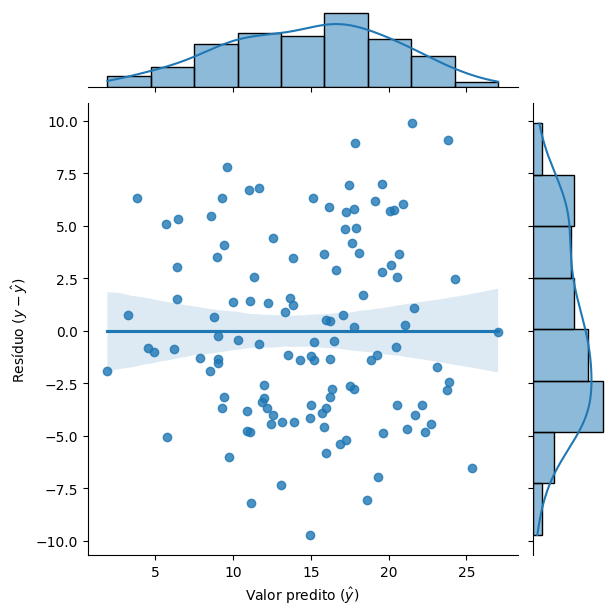

In [120]:
# ajustado X resíduo
sns.jointplot (x=modelo.predict(), y=modelo.resid, kind='reg')
plt.xlabel('Valor predito ($\hat y$)')
plt.ylabel('Resíduo ($ y -\hat y$)')

In [121]:
#teste de normalidade dos resdiduos
#h0: os dados sao normais
#h1: os dados nao sao normais
stats.shapiro(modelo.resid)
# sai primeiro a estatistica do teste de depois o p-valor do teste

ShapiroResult(statistic=0.9769707908828875, pvalue=0.03868875663254575)

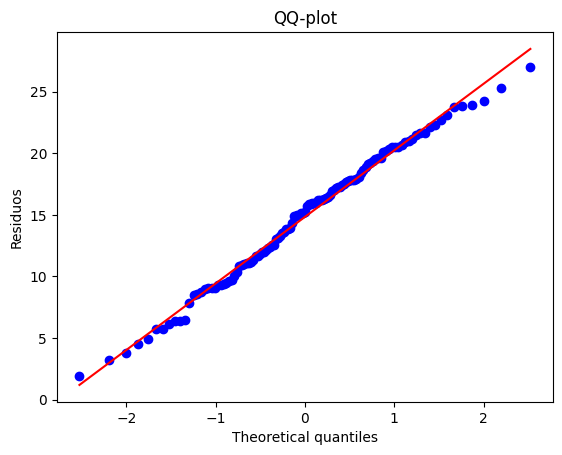

In [122]:
# fazendo o qq plot, caso queira
fig = plt.figure()
res = stats.probplot(modelo.predict(), plot=plt)
plt.ylabel('Residuos')
plt.title('QQ-plot')
plt.show()

In [123]:
#teste de homogeneidade de variancia Breusch-Pagan test
#h0: as variâncias dos erros sao iguais (homoscedasticidade)
#h1: as variâncias dos erros nao sao iguais (heteroscedasticidade)
names = ['Lagrange multiplier statistic', 'p-value' , 'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 11.751705057038064),
 ('p-value', 0.22767167598765192),
 ('f-value', 1.3270719666591253),
 ('f p-value', 0.23127851265886304)]

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import pandas as pd

# Define the variables for VIF calculation
variables_bodyfat = 'Density + Age + Weight + Height + Neck + Chest + Abdomen + Hip + Thigh + Knee + Ankle + Biceps + Forearm + Wrist'

# Get y and X based on the regression
y_bodyfat, X_bodyfat = dmatrices('bodyfat ~' + variables_bodyfat, df, return_type='dataframe')

# Calculate VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_bodyfat.values, i) for i in range(X_bodyfat.shape[1])]
vif["Variables"] = X_bodyfat.columns
vif.sort_values(by='VIF Factor')


,VIF Factor,Variables
4,1.677765,Height
11,1.920035,Ankle
13,2.236999,Forearm
2,2.274699,Age
14,3.521509,Wrist
12,3.651611,Biceps
1,3.818257,Density
5,4.396475,Neck
10,4.612291,Knee
9,7.887715,Thigh
